# Uber Rides Data Analysis 

In [1]:
#Importing required libraries:

import pandas as pd                
import seaborn as sns              
import matplotlib.pyplot as plt    
%matplotlib inline  


In [2]:
#Reading data:

data = pd.read_csv('Uber_drives_data.csv')
print(data.shape)                  #printing the number of rows and columns respectively
data.head(5)                       #printing the top 5 rows

(1156, 7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The given dataset has 1156 rows and 7 columns, containing all the information about the Uber rides.

In [3]:
#Understanding the data more:

data.describe()    #for statistical description of data

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [4]:
#Checking the need of data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#Checking if there is any duplicate value:

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155    False
Length: 1156, dtype: bool

The dataset does not have any duplicate values.

In [6]:
#Renaming column names for convenience:

data.columns = ['Start_Date','End_Date','Category','Start_Point','Stop_Point','Miles','Purpose']
data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
data.isnull().sum()     #checking if there is any null value

Start_Date       0
End_Date         1
Category         1
Start_Point      1
Stop_Point       1
Miles            0
Purpose        503
dtype: int64

Clearly, the dataset does have null values. The data needs to be cleaned in order to do its analysis and visualization.

<AxesSubplot:>

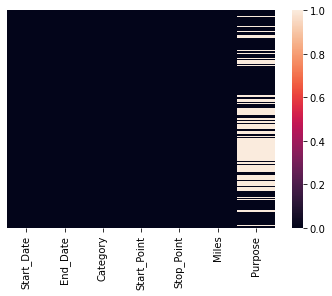

In [8]:
sns.heatmap(data.isnull(), yticklabels = False)

Clearly, the 'Purpose' column contains a lot of null values while other columns (except miles and start date) have 1 null value. The null values in Purpose column can't be dropped as doing this leads to working with approximately half of the data. The other null values can be dropped.

In [9]:
#Setting null values in the Purpose column to 'Unknown' as the purpose is not mentioned for them

data['Purpose'] = data['Purpose'].fillna('Unknown')
data.head()




,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
#Dropping null values in End Date, Category, Start Location and Stop Location columns:

data = data.dropna()
data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
#Checking if data is cleaned or not:

data.isnull().sum()


Start_Date     0
End_Date       0
Category       0
Start_Point    0
Stop_Point     0
Miles          0
Purpose        0
dtype: int64

<AxesSubplot:>

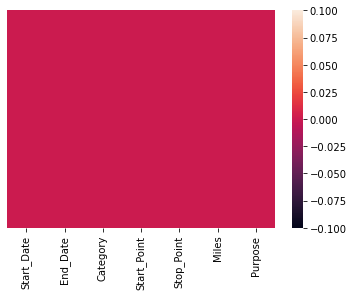

In [12]:
sns.heatmap(data.isnull(), yticklabels = False)

Clearly, there are no null values left.

At this stage, the start and end dates are given in the data, but not the duration. The duration is needed in order to know how much time did the rides took. For this, the Start Date and End Date which are data objects need to be converted to datetime objects.

In [13]:
#Converting the Start_Date and End_Date date objects into datetime objects to get duration:

data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['End_Date'] = pd.to_datetime(data['End_Date'])

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Segregating the hour, day of the week and month is needed for further analysis.

In [14]:
#Creating new columns of hour, day of the week and month:

data['Hour'] = data['Start_Date'].apply(lambda time: time.hour)
data['Day_of_the_Week'] = data['Start_Date'].apply(lambda time: time.dayofweek)
data['Month'] = data['Start_Date'].apply(lambda time: time.month)

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,4,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,5,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,2,1


For proper analysis, the Day of the week and Month columns need to be in words, for example, 0 means Monday, 1 means Tuesday etc. in Day of the week column while in month column, 1 means January, 2 means February etc.

In [15]:
#Creating a dictionary for Day of the week column:

a = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day_of_the_Week'] = data['Day_of_the_Week'].map(a)

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,1


In [16]:
#Creating a dictionary for Month column:

b = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
data['Month'] = data['Month'].map(b)

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January


In [17]:
#Calculating duration of the rides:

data['Ride_Duration'] = data['End_Date'] - data['Start_Date']

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,0 days 01:07:00


In the dataset, the ride_duration is given in terms of days and time. Days need to be removed from the duration.

In [18]:
#Removing days from the Ride_Duration:

data['Ride_Duration'] = data['Ride_Duration'].astype(str).map(lambda x: x[7:])

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,01:07:00


The dataset is now ready for visualization.

### Visualizing the data

Text(0, 0.5, 'Number of rides')

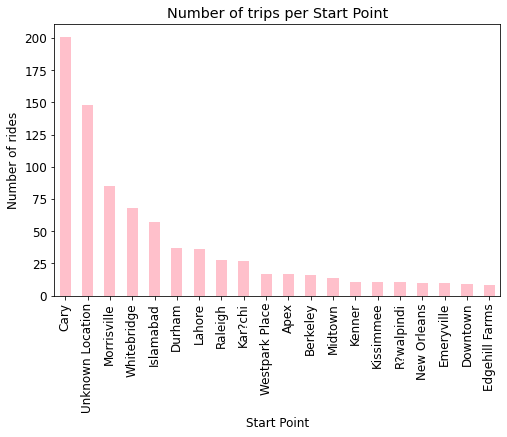

In [111]:
#Checking the most common starting points of the Uber rides:

data.Start_Point.value_counts().nlargest(20).plot(kind='bar', figsize=(8,5),color=['pink'])
plt.title('Number of trips per Start Point')
plt.xlabel('Start Point')
plt.ylabel('Number of rides')

Most of the Uber rides have started from Cary and some starting locations are unknown.

Text(0, 0.5, 'Number of rides')

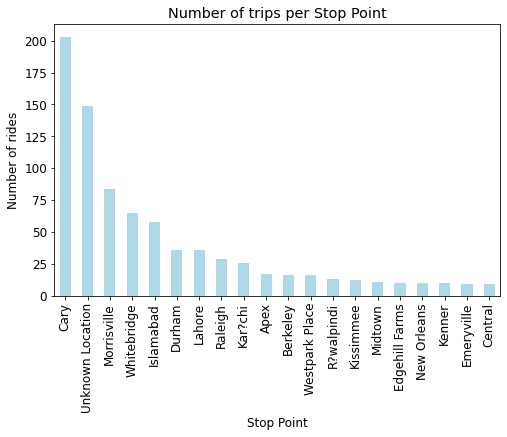

In [112]:
#Checking the most common ending points of the Uber rides:

data.Stop_Point.value_counts().nlargest(20).plot(kind='bar', figsize=(8,5),color=['lightblue'])
plt.title('Number of trips per Stop Point')
plt.xlabel('Stop Point')
plt.ylabel('Number of rides')

Most of the Uber rides have ended at Cary and some ending locations are unknown.

Text(0.5, 1.0, 'Purpose of Uber rides')

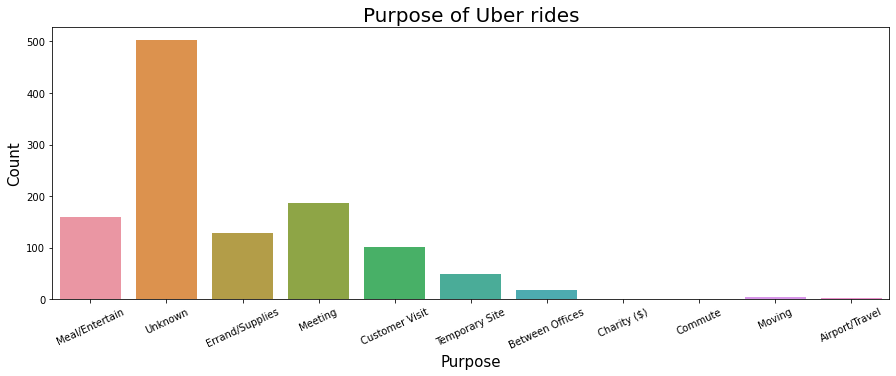

In [31]:
#To know for what purpose most of the Uber users use Uber for:

plt.figure(figsize=(15,5))
a = sns.countplot(x='Purpose', data = data)
a.set_xticklabels(a.get_xticklabels(), rotation=25)
a.set_xlabel("Purpose", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Purpose of Uber rides', fontsize = 20)

It is evident that for most of the rides, the purpose is unknown. For other rides, the user prefers Uber rides to go for any meeting and for meal/entertainment purposes.

Text(0.5, 1.0, 'Category of Uber rides')

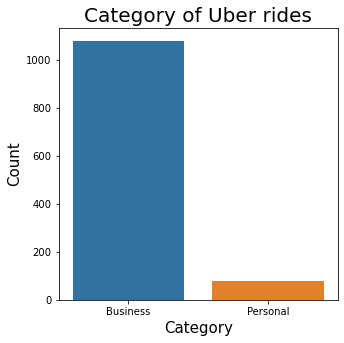

In [30]:
#To know for what what category most of the Uber users use Uber for:

plt.figure(figsize=(5,5))
a = sns.countplot(x='Category', data = data)
a.set_xticklabels(a.get_xticklabels())
a.set_xlabel("Category", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Category of Uber rides', fontsize = 20)

The user prefers Uber rides for his/her business work for 1000+ rides.

In [35]:
#Checking the maximum and minimum durations of Uber rides:

print('Maximum ride duration is:', data['Ride_Duration'].max())
print('Minimum ride duration is:', data['Ride_Duration'].min())

Maximum ride duration is: 05:36:00
Minimum ride duration is: 00:00:00


As the minimum ride duration is 00:00:00, it means that ride(s) would be cancelled for some reasons.

In [37]:
#Checking the maximum and minimum distance of Uber rides:

print('Maximum ride distance is:', data['Miles'].max(), 'miles.')
print('Minimum ride distance is:', data['Miles'].min(), 'miles.')

Maximum ride distance is: 310.3 miles.
Minimum ride distance is: 0.5 miles.


In [40]:
#Checking if the maximum ride time was taken for that trip which covered maximum miles:

Required_Duration = data.loc[data['Miles'] == 310.3]
Required_Duration


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,Friday,March,05:30:00


It is clear that the ride duration of the trip which covered 310.3 (maximum) miles is 5 hours 30 minutes, which is not the maximum ride time.

In [42]:
#Checking the miles covered by the trip which took maximum time:

Required_Mile = data.loc[data['Ride_Duration'] == '05:36:00']
Required_Mile


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Unknown,21,Tuesday,September,05:36:00


Interestingly, the maximum ride duration is for the trip which covers 195.6 miles. This may be due to heavy traffic.

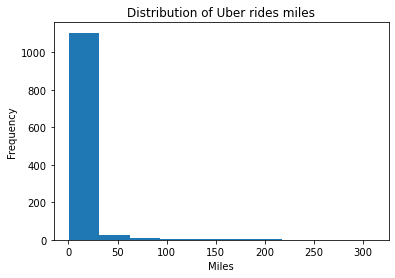

In [46]:
#Checking the distribution of miles of the Uber rides:

data['Miles'].plot.hist()
plt.title('Distribution of Uber rides miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

The user uses Uber rides mostly for short trips (< 25 miles).

Text(0.5, 1.0, 'Number of Uber rides per month')

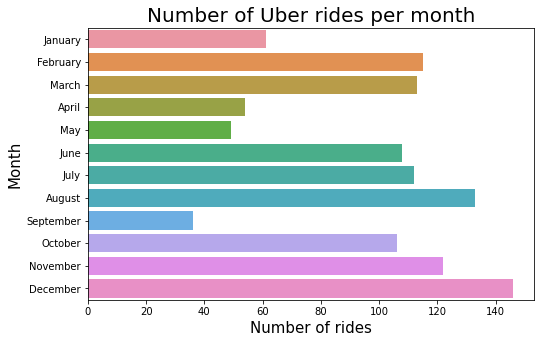

In [67]:
#Checking the number of rides per month:

plt.figure(figsize=(8,5))
abc = sns.countplot(y='Month', data = data)
abc.set_yticklabels(abc.get_yticklabels())
abc.set_xlabel("Number of rides", fontsize = 15)
abc.set_ylabel("Month", fontsize = 15)
abc.set_title('Number of Uber rides per month', fontsize = 20)

The user has taken maximum Uber rides in the month of December, followed by August and November.

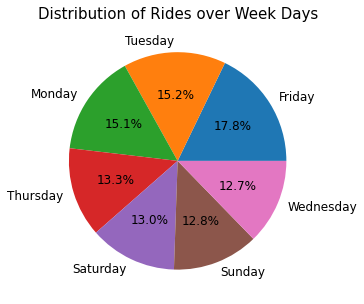

In [95]:
#Checking the percentage of the number of rides per day of the week:

types = data["Day_of_the_Week"].value_counts()
labels = types.index
values = types.values

plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.rc('font', size=12)
plt.title("Distribution of Rides over Week Days", fontsize=15)
plt.show()


The user has preferred 17.8 % of total Uber rides on Friday, followed by rides on Tuesday and Monday. On rest of the days, the user has taken similar number of rides.

Text(0.5, 1.0, 'Number of Uber rides per week day per category')

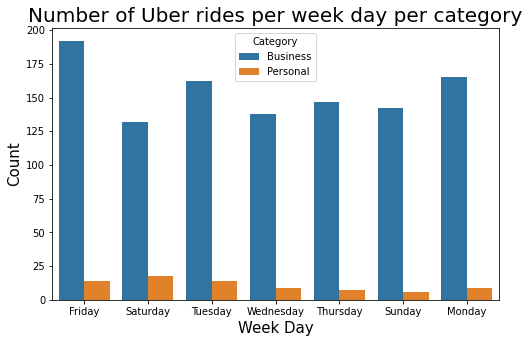

In [70]:
-Duration#Analyzing the number of trips per week day per category:

plt.figure(figsize=(8,5))
plot = sns.countplot(x='Day_of_the_Week', data = data, hue = 'Category')
plot.set_xlabel("Week Day", fontsize = 15)
plot.set_ylabel("Count", fontsize = 15)
plot.set_title('Number of Uber rides per week day per category', fontsize = 20)

On all the week days, the user prefers Uber rides mainly for Business purposes.

Text(0.5, 1.0, 'Ride_Duration versus Miles')

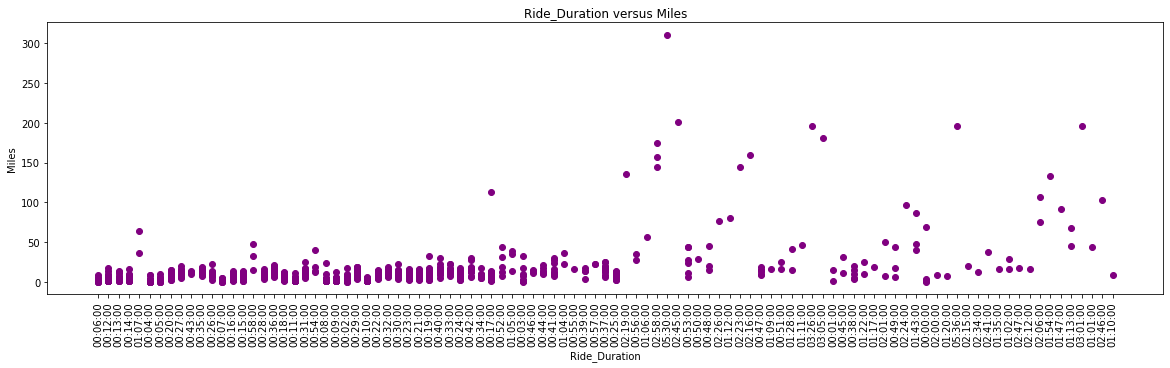

In [92]:
#Plot of Ride Duration versus Miles:

plt.figure(figsize=(20,5))
plt.scatter(x='Ride_Duration', y='Miles', data=data, color='purple')

plt.xticks(rotation=90)
plt.xlabel('Ride_Duration')
plt.ylabel('Miles')
plt.title('Ride_Duration versus Miles')



There is no linear relationship between the miles and the ride duration. This may be due to different speeds of the Uber drivers and traffic jam.

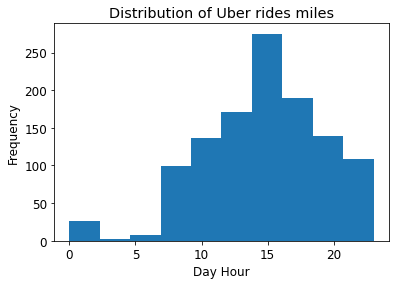

In [116]:
#Checking the preferred time of the day for Uber rides:

data['Hour'].plot.hist()
plt.title('Distribution of Uber rides day hours')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.show()

From the plot, it is evident that the user takes Uber rides mostly during the afternoon. A very few rides have been taken in the early morning.

### Insights

From the Exploratory Data Analysis of the Uber rides data, following insights can be made:
    
1. The most common starting and ending locations of the uber rides are Cary, Morrisville, Whitebridge, Islamabad etc. other than the unknown locations.
2. The user has taken Uber rides mainly for Business reasons. For mostly rides, the purpose is unknown. Besides this, main purposes include meeting and meal or entertainment.
3. Most of the rides of the user have covered < 25 miles.
4. The user has taken maximum Uber rides in the month of December while minimum rides in the month of September.
5. The minimum duration of the ride is 0 seconds, indicating that a very few rides have been cancelled.
6. The user has preferred Uber rides the most on Friday as compared to the other week days.
7. The user travels by Uber mostly during the day time.
8. The ride duration is not directly proportional to the distance covered in the Uber ride. This may be due to the different speeds of the drivers or heavy traffic.